In [62]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [63]:
# loading file
df=pd.read_csv("eplmatches.csv")
# show the data
df.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [175]:
# GET POINTS FOR EACH TEAM PLAYED IN MATCH
df['HT_points'] = np.where(df['FTR'] == 'H',3, np.where(df['FTR'] == 'A', 0, 1))
df['AT_points'] = np.where(df['FTR'] == 'H',0, np.where(df['FTR'] == 'A', 3, 1))
df.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR,HT_points,AT_points,Result,HG_points,AG_points,Winner,WinnerGoals,TotalGoal,GoalDif
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,3,0,HomeTeamWin,3,0,Coventry City,2,3,1
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,3,0,HomeTeamWin,3,0,Leeds United,2,3,1
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,3,0,HomeTeamWin,3,0,Sheffield Utd,2,3,1
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,1,1,Draw,1,1,Draw,3,6,0
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,0,3,AwayTeamWin,0,3,Norwich City,4,6,-2


In [50]:
# What is the best playing style to gain as many points as possible?? (Offense or Defense)
#To answer this question we should know first teams scored more goals at Home and Away  and their rates
# then calc points win for their teams
# notes we use some abbreviations(AT = away team)(HT = home team)(A =away )(H=home)(O = offense)(D= defense)

In [188]:
#avg for all
Avg_home_goal = df.groupby('Home').mean()['HomeGoals'].reset_index().rename(columns={'Home':'Team'}) 
Avg_away_goal = df.groupby('Away').mean()['AwayGoals'].reset_index().rename(columns={'Away':'Team'})
#  merge tables
avg_goal = Avg_home_goal.merge(Avg_away_goal).sort_values(by=['HomeGoals', 'AwayGoals'], ascending = False)
avg_goal.head()

,Team,HomeGoals,AwayGoals
27,Manchester Utd,2.107639,1.685764
25,Liverpool,2.006944,1.501736
0,Arsenal,2.003472,1.498264
26,Manchester City,1.989605,1.457380
14,Chelsea,1.946181,1.479167


In [165]:
home_goals = df.groupby(['Home'])['HomeGoals'].sum().reset_index()
home_goals.columns = ['index','Home Goals']
# Count Away Goals 
away_goals = df.groupby(['Away'])['AwayGoals'].sum().reset_index()
away_goals.columns = ['index','Away Goals']

##### Merge table
total_goals_scored = pd.merge(home_goals, away_goals)
total_goals_scored.sort_values(by=['Home Goals','Away Goals'], ascending = False).head()

,index,Home Goals,Away Goals
27,Manchester Utd,1214,971
25,Liverpool,1156,865
0,Arsenal,1154,863
14,Chelsea,1121,852
43,Tottenham,995,750


In [177]:
# analyse offense team 
#Assume offense team should be score at least a goal in match  regardless of win or lose
offense_play = df.loc[(df.HomeGoals !=0) & (df.AwayGoals !=0)]
HO_play = offense_play.groupby(['HomeGoals'])['HT_points'].mean()
AO_play = offense_play.groupby(['AwayGoals'])['AT_points'].mean()
Home_Away_offense_play = pd.concat([AO_play, HO_play], axis=1).rename(columns={'AT_points':'AO_points','HT_points':'HO_points'})
# analyse defense team
defensive_play = df.loc[(df.HomeGoals ==0) | (df.AwayGoals ==0)]
AD_play = defensive_play.groupby(['AwayGoals'])['AT_points'].mean()
HD_play = defensive_play.groupby(['HomeGoals'])['HT_points'].mean()
Home_Away_defensive_play = pd.concat([ HD_play,AD_play], axis=1 ).rename(columns={'AT_points':'AD_points','HT_points':'HD_points'})

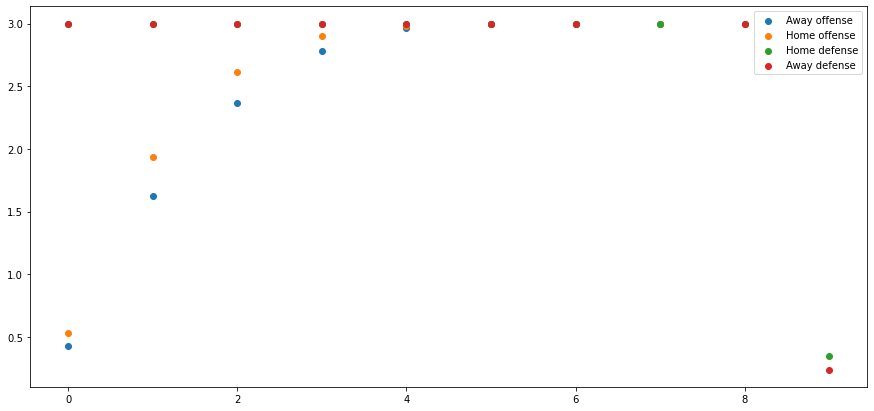

In [190]:
Offense_or_defense = pd.concat([Home_Away_offensive_play, Home_Away_defensive_play], axis=1)
plt.rcParams['figure.figsize'] = [15, 7]
ax = plt.gca()
x=[0,1,2,3,4,5,6,7,8,9]
plt.scatter(x,Offense_or_defense['AO_points'])
plt.scatter(x,Offense_or_defense['HO_points'])
plt.scatter(x,Offense_or_defense['HD_points'])
plt.scatter(x,Offense_or_defense['AD_points'])
plt.legend(["Away offense","Home offense","Home defense","Away defense"])

plt.show()